# Student grades prediction

# Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-

•  https://github.com/dsrscientist/dataset4
    
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')


# Exploratory Data Analysis (EDA)

In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [6]:
df.shape

(571, 43)

In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [8]:
df.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [9]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [10]:
df.info() # To get good overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [11]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [12]:
# Extract rows with null values
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

     Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
44   CS-97045      D      C    NaN       NaN    NaN     C-    NaN    NaN   
60   CS-97061      C     B+     WU        D+     C-     B-      F      D   
86   CS-97087      D      D     D+        B-      F      D      D      D   
91   CS-97092     WU     C-      D         D     WU      D      D      D   
137  CS-97138     C-     C+     WU        WU     WU      B     WU     WU   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
423  CS-97424      D     D+      D         D     C-      C     C+     B-   
424  CS-97425     C-     D+     B-        C+     D+     C-     A-     C-   
481  CS-97482     B-     A-     C+         D      B      B     A-     A-   
543  CS-97544      A      B      A        A-     A-      A     B+     B+   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
44      D+  

# Seperating Numerical and Categorical columns

In [13]:
# Checking for Categorical columns

categorical_col =[]

for i in df.dtypes.index:
    if df.dtypes[i] =="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

# Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print ("Numerical columns:",numerical_col)

Categorical columns: ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


Numerical columns: ['CGPA']


# Encoding categorical columns using OrdinalEncoder

In [29]:

# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448


# np.nan,None,NaN,others

In [31]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

# Fill NaN values with column means for all columns

In [34]:
# Calculate column means for all columns
column_means = df.mean()

# Fill NaN values with column means for all columns
df = df.fillna(column_means)

# Now data contains NaN values replaced with column means for all columns

In [35]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

# check the null values in Data visualization 

<AxesSubplot:>

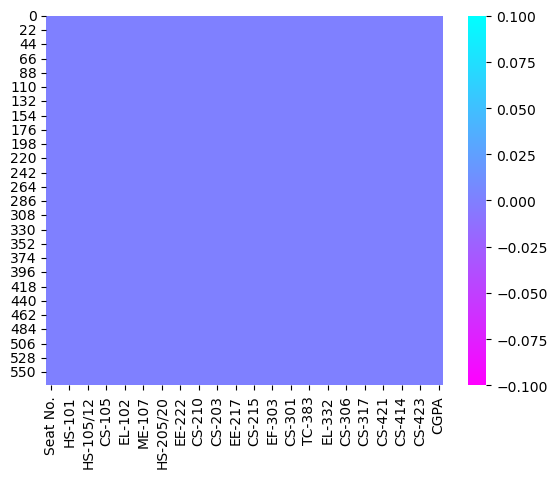

In [36]:
# Lets check the null values again
sns.heatmap(df.isnull(),cmap ="cool_r")

# Number of uniques number and nunique()

In [37]:
#Number of uniques number
df.nunique().to_frame("No. of unique values")

,No. of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,14
HS-105/12,14
MT-111,14
CS-105,11
CS-106,14
EL-102,14
EE-119,13


In [38]:
df['CGPA'].nunique()

491

In [39]:
df['CGPA'].unique()

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.418, 2.564, 2.468, 3.769,
       2.999, 2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458,
       2.34 , 3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171,
       3.761, 2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084,
       1.38 , 1.89 , 3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396,
       3.772, 1.768, 3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 2.3  ,
       3.759, 3.516, 2.087, 3.137, 2.011, 2.566, 1.993, 3.334, 2.056,
       2.552, 2.028, 2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 , 2.208,
       2.698, 2.823,

In [42]:
df["CGPA"].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

# Checking the space/ blank in column

In [43]:
# Checking the space in CGPA column
df.loc[df["CGPA"]==" "] 

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


There is no blanks in the target column

# overview of the dataset

In [40]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    float64
 1   PH-121     571 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    float64
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    float64
 19  CS-214     571 non-null    float64
 20  EE-217    

In [41]:
df.shape[0]

571

# Description of Dataset-Statistical summary

In [45]:
# Statistical summary of numerical columns

df.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.903509,4.249123,3.903339,2.838879,4.130053,3.966608,3.892794,...,4.126560,4.831843,3.506261,5.436494,3.156379,2.453405,3.899642,4.016158,3.217480,2.954888
std,164.977776,3.046895,2.785317,2.962246,3.195563,2.986427,2.696709,2.724282,3.029205,2.655171,...,3.337194,2.740276,2.937874,2.706553,2.433723,2.472405,2.365831,2.778001,2.294054,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.966608,3.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,427.500000,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,570.000000,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


This gives the statistical informed of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can absoerve the following:-

1) The counts of all the columns are same which means there are no missing values in the dataset.

2) The means value is greater than the median(50%) in columns which means the data is skewed to right in these

3) The means value is  less than median which means the data is skewed to left.

4) By summarizing the data we can observe there is huge differeces between 75% and max hence there are outliers present in the data.

5) We can also notice the standard deviation, min,25% percantile values from this describw method

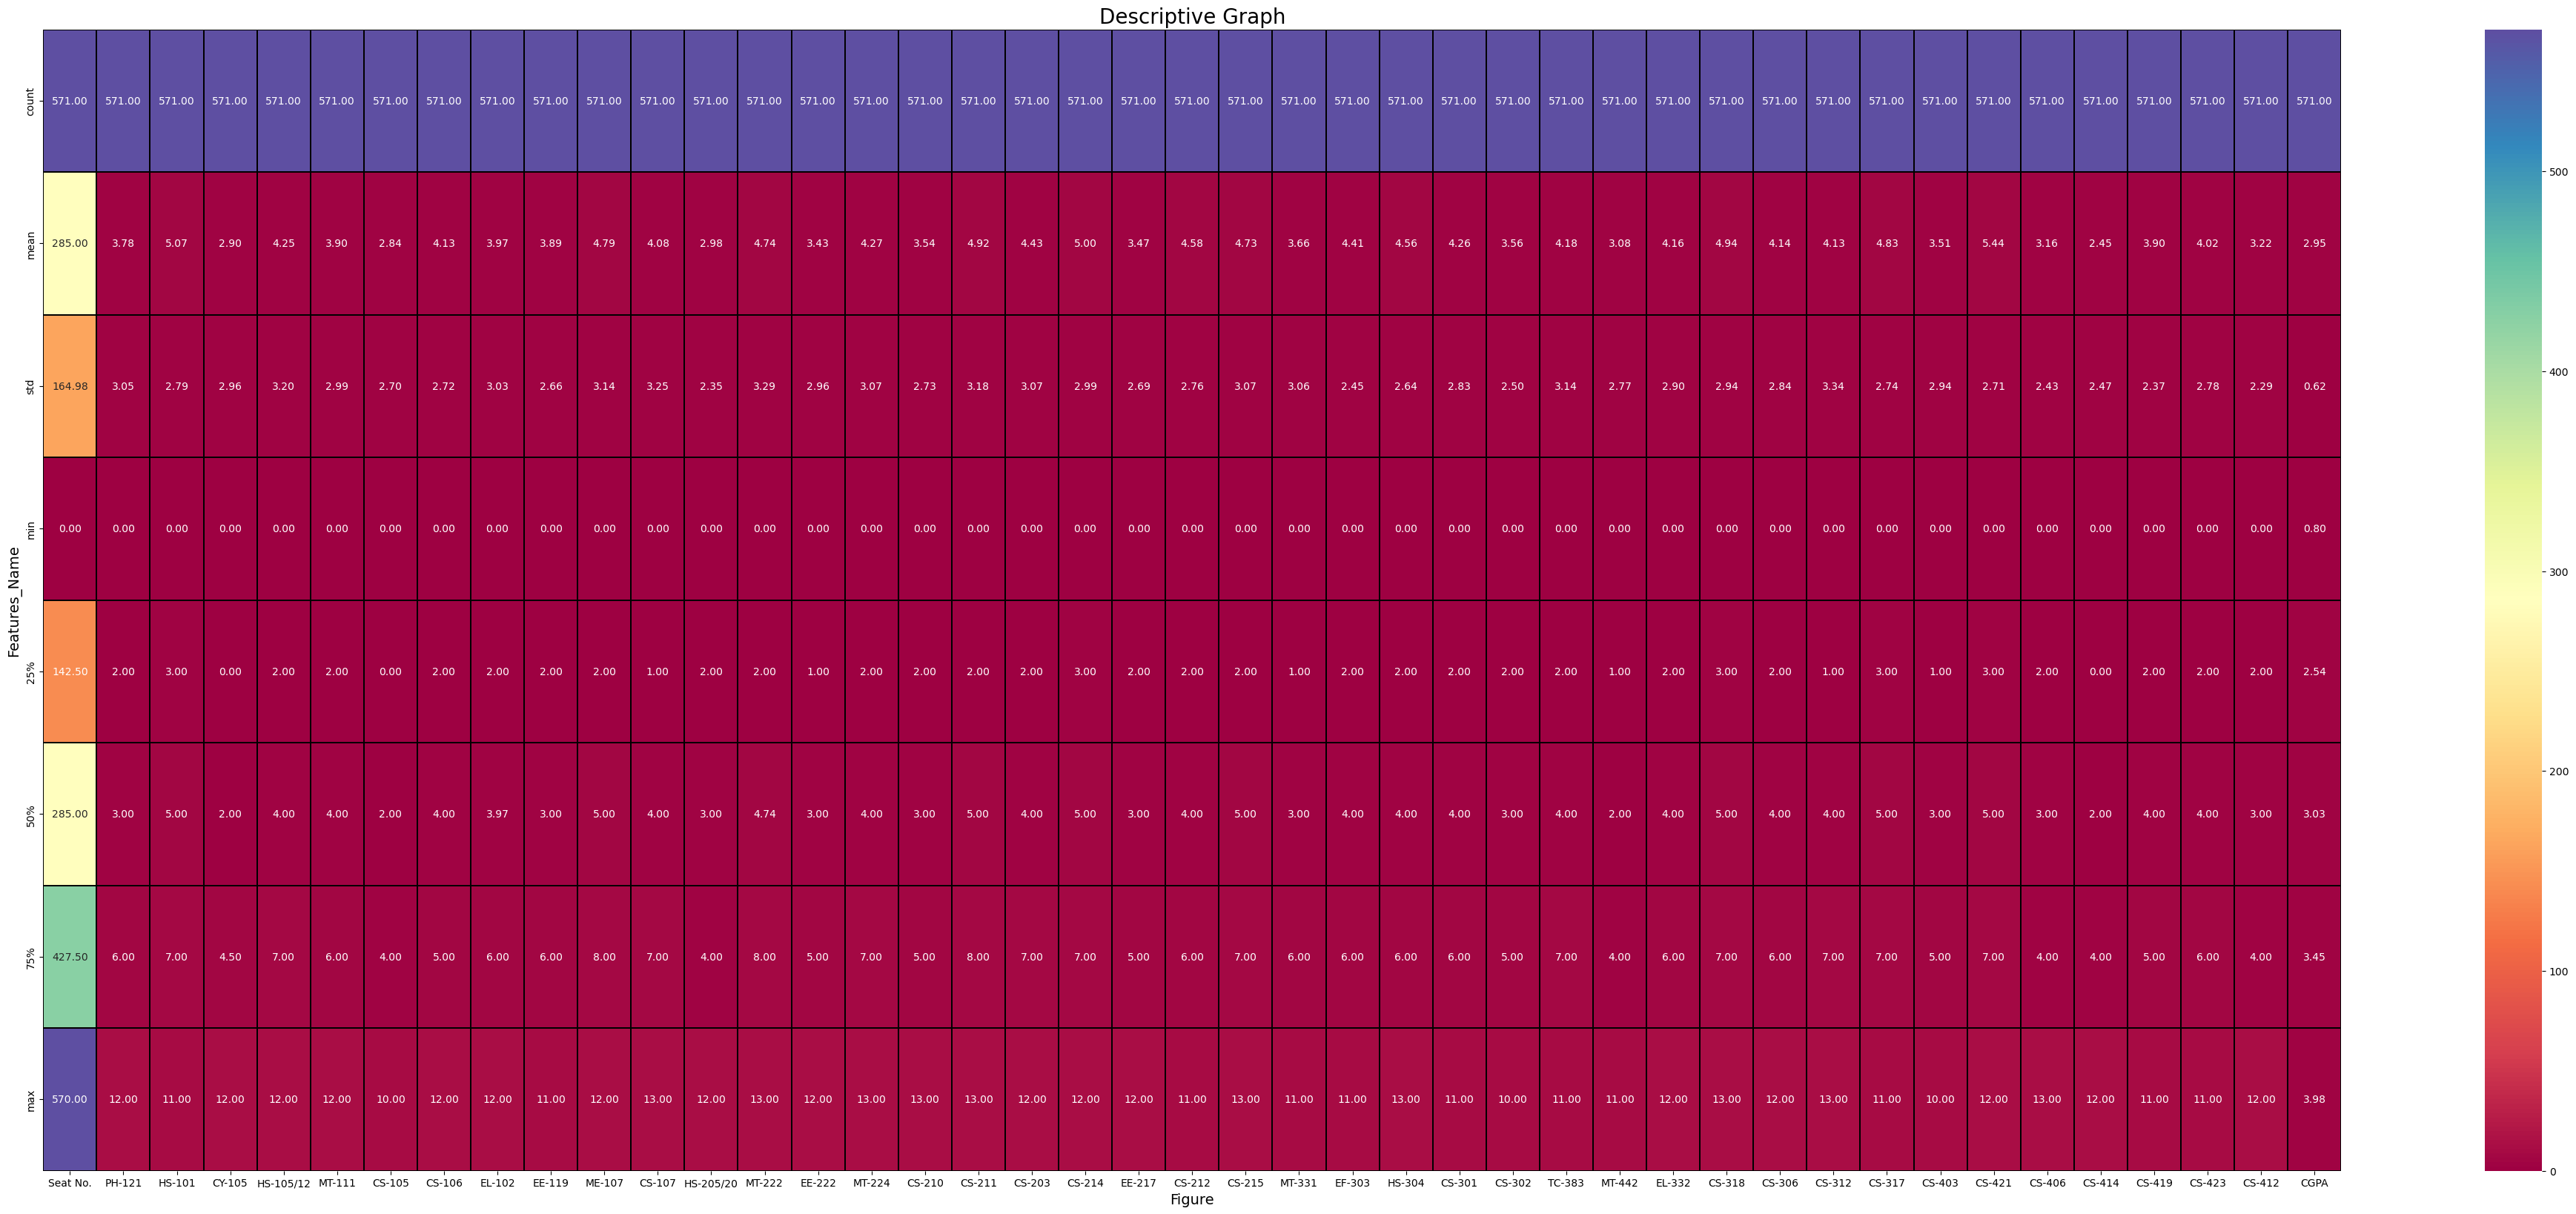

In [50]:
plt.figure(figsize =(50,20))
sns.heatmap(df.describe(), annot =True, fmt ='0.2f',linewidth = 0.2, linecolor ='black',cmap = 'Spectral')
plt.xlabel ('Figure', fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph',fontsize =20)
plt.show()

# Check Outliers

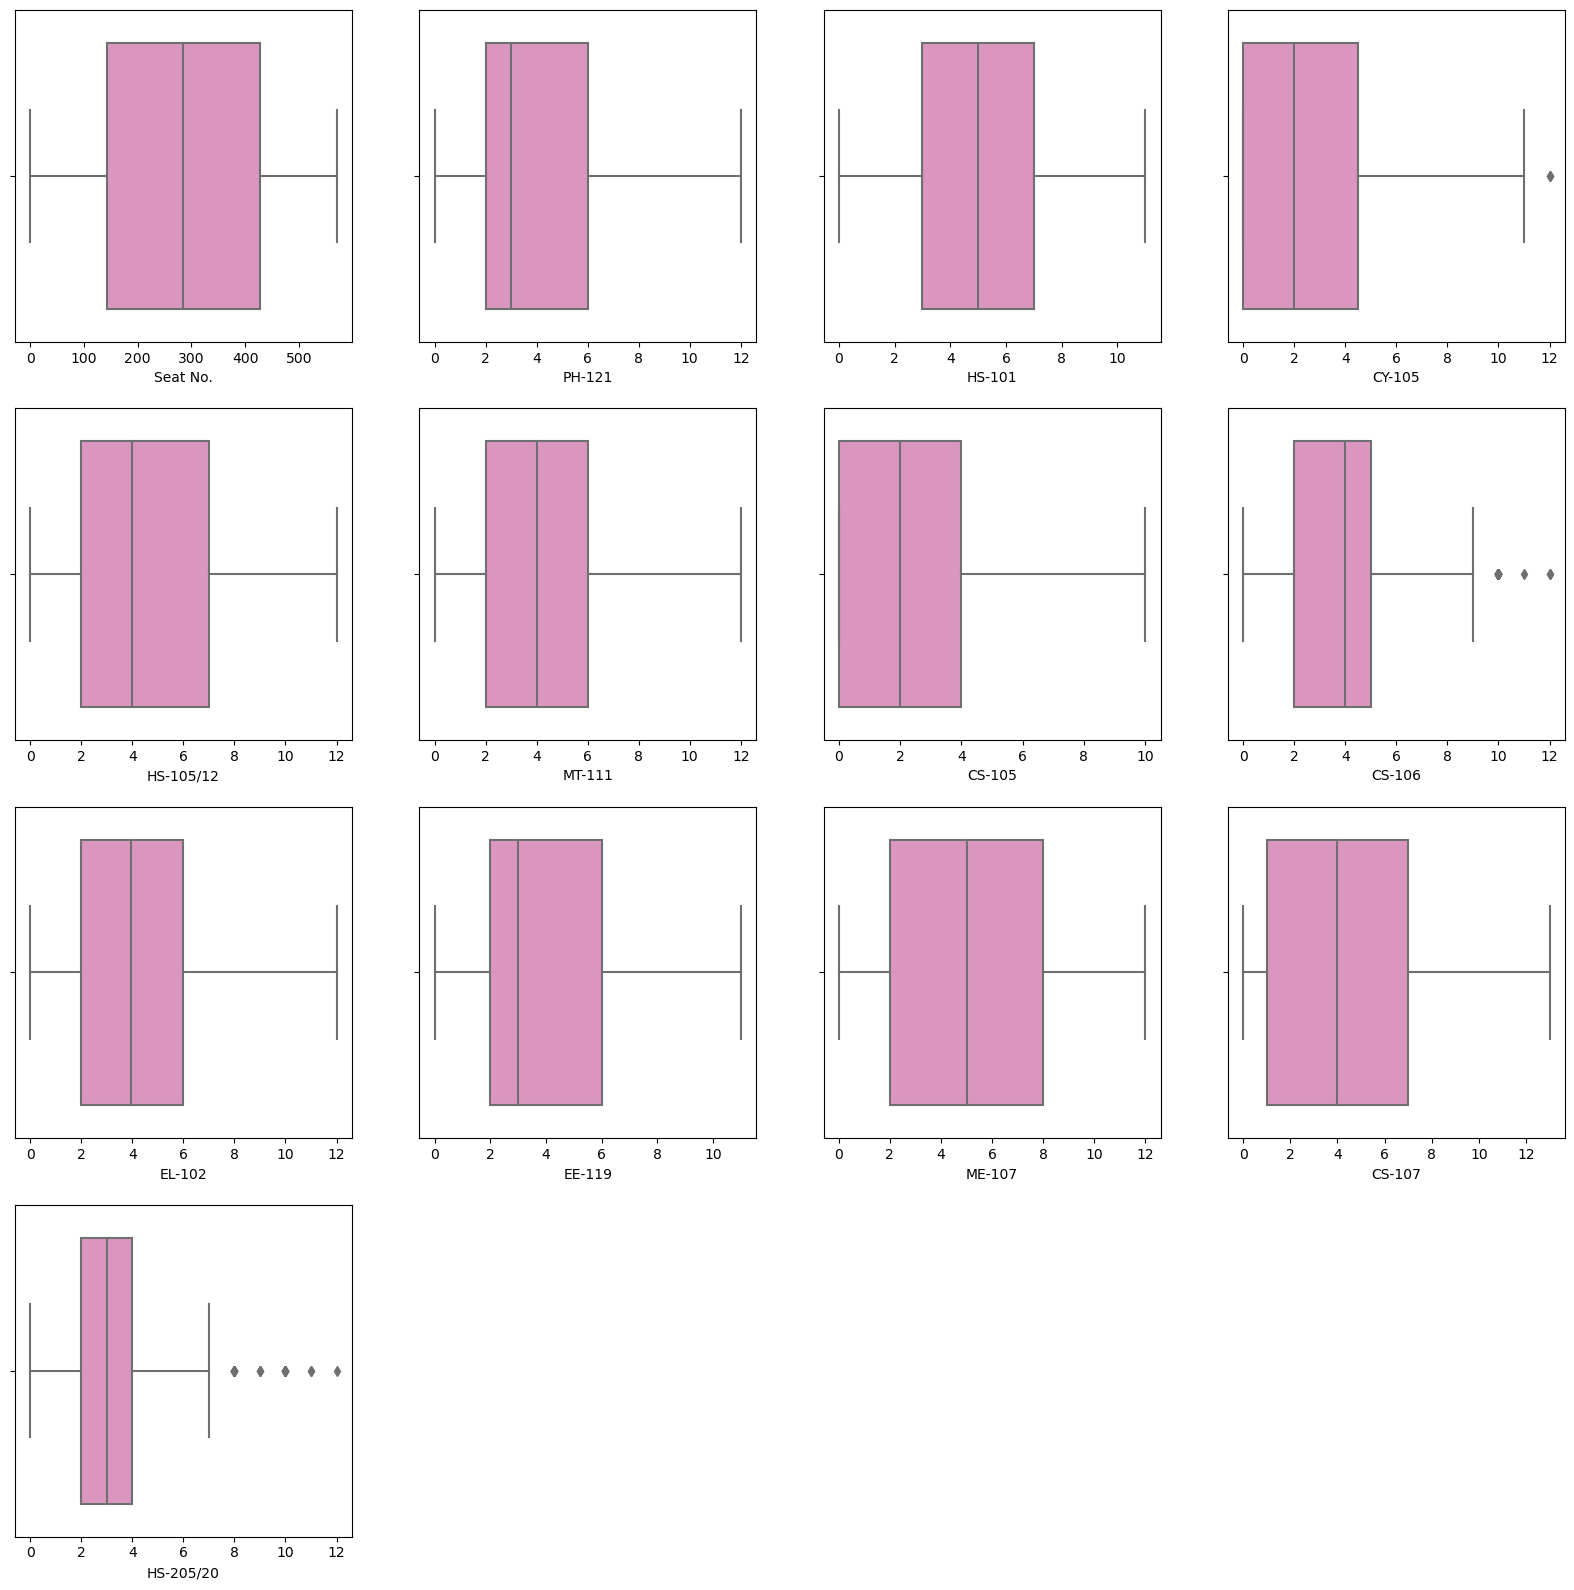

In [51]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
    p+=1
    

plt.show()

# Remove outliers

In [ ]:
from scipy.stats import zscore
out_features =df[['bmi']]
z=np.abs(zscore(out_features))
z

In [ ]:
# threshold = 3
np.where(z>3)

# Checking how the data has been distributed in each column

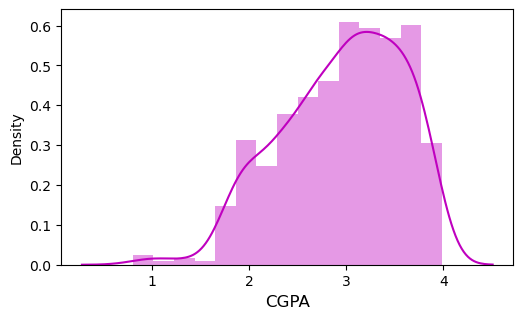

In [52]:
#lets check how the data has been distributed  in remaining in column:
plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

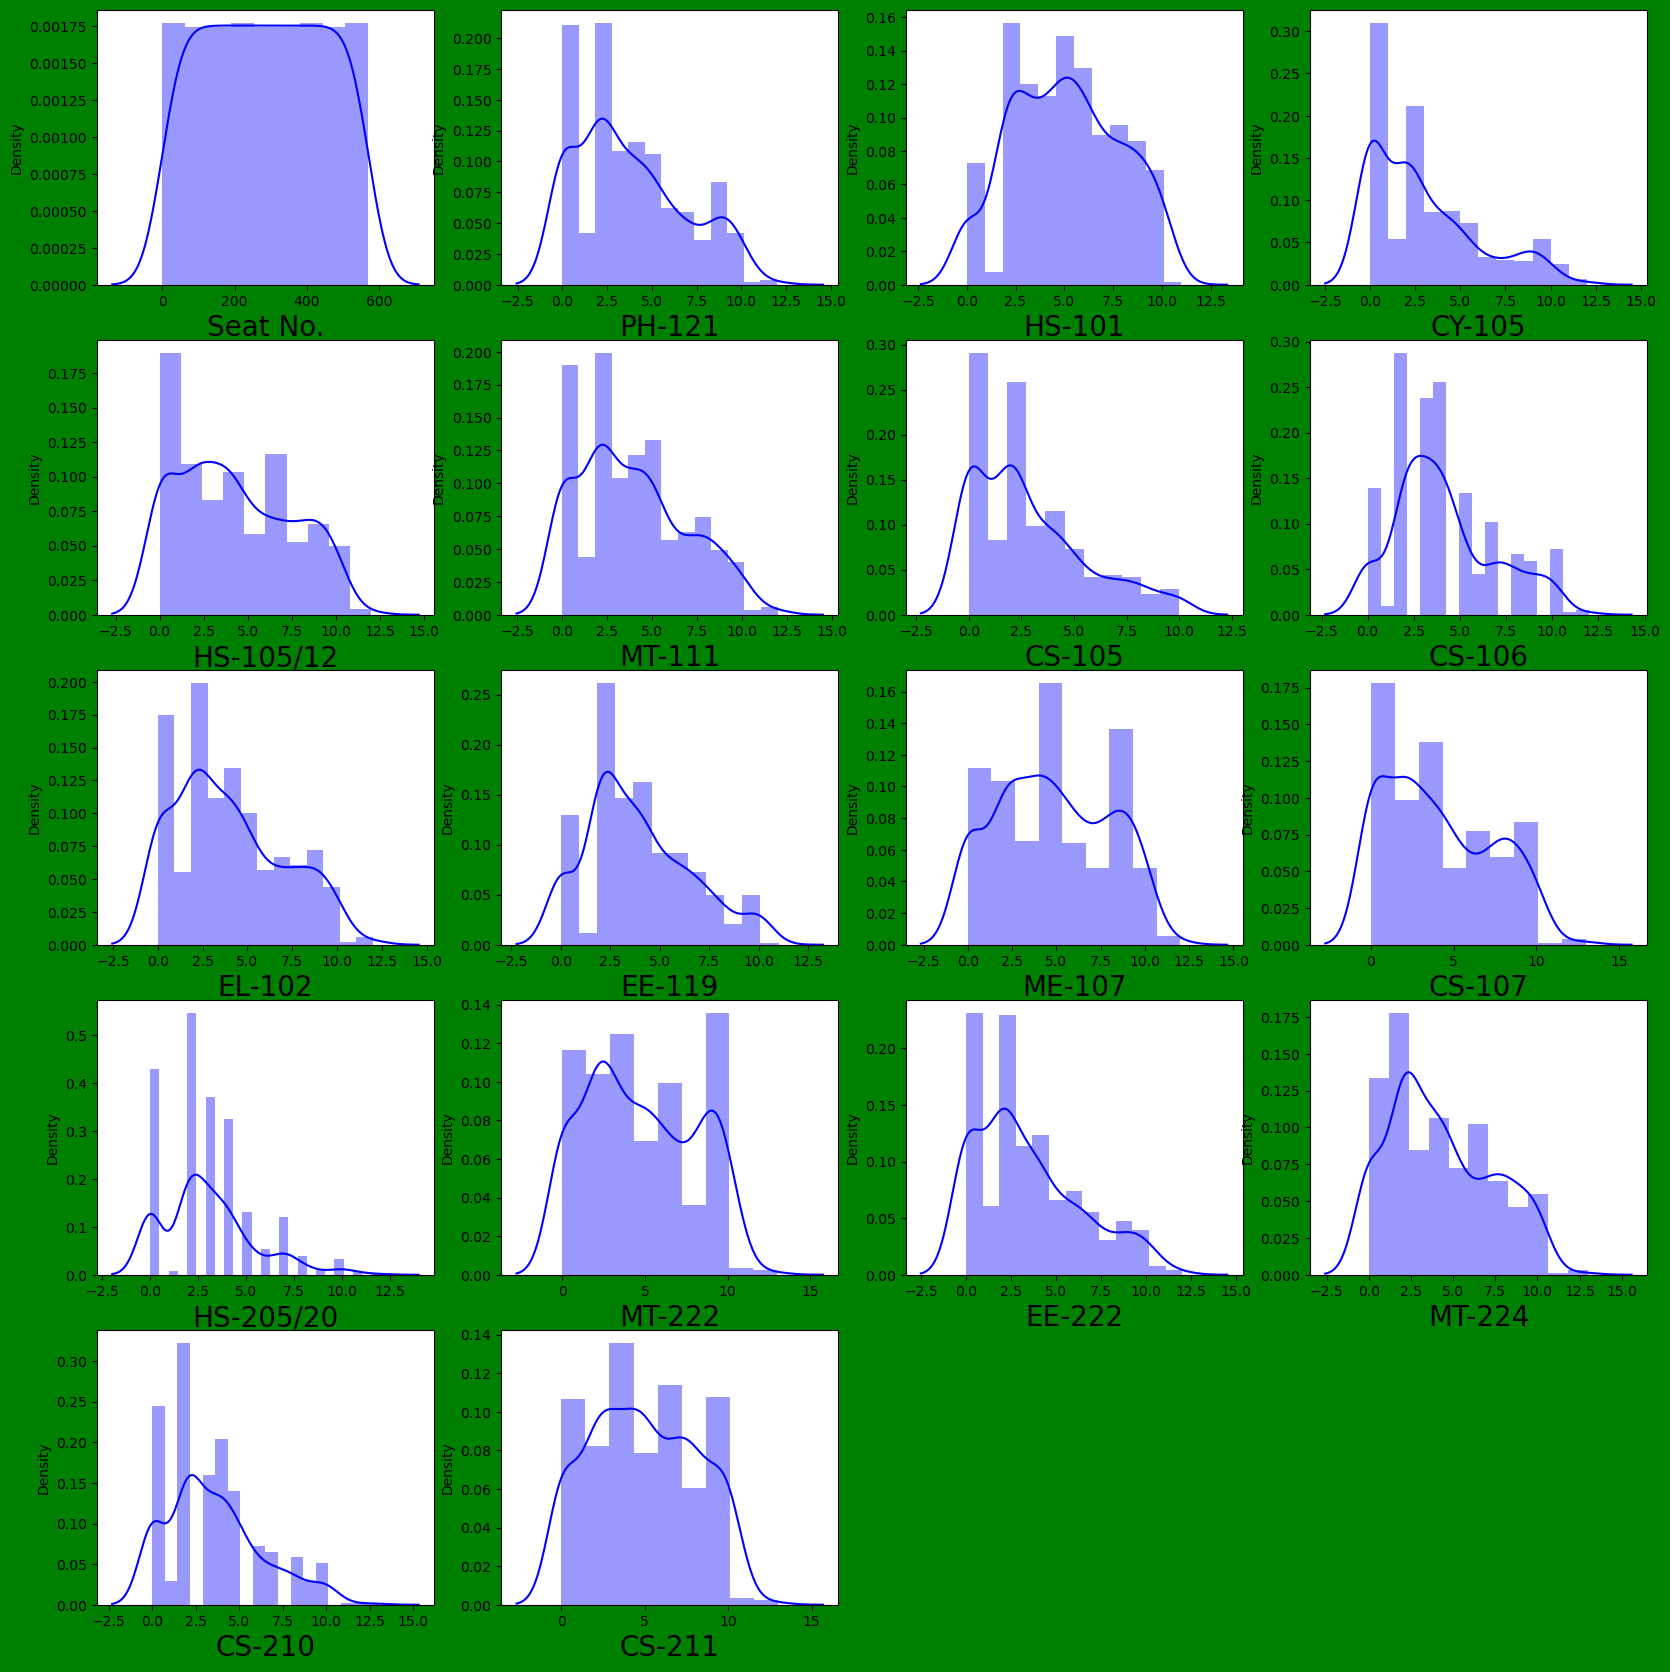

In [53]:
plt.figure(figsize=(20,25) , facecolor ='green')

plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color ='b')
        plt.xlabel(column,fontsize =20)
    plotnumber+=1
plt.show()

# Checking for Skewness

In [54]:
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       0.981105
HS-105/12    0.322796
MT-111       0.480121
CS-105       0.930769
CS-106       0.635318
EL-102       0.496377
EE-119       0.570158
ME-107       0.101909
CS-107       0.411937
HS-205/20    0.888830
MT-222       0.178750
EE-222       0.753403
MT-224       0.412283
CS-210       0.709481
CS-211       0.099796
CS-203       0.259832
CS-214       0.023352
EE-217       0.712091
CS-212       0.399317
CS-215       0.144729
MT-331       0.617889
EF-303       0.357333
HS-304       0.522265
CS-301       0.388341
CS-302       0.578991
TC-383       0.316091
MT-442       0.853815
EL-332       0.435999
CS-318       0.332496
CS-306       0.401096
CS-312       0.416935
CS-317       0.144586
CS-403       0.603938
CS-421       0.141523
CS-406       1.385275
CS-414       1.288571
CS-419       0.473725
CS-423       0.491719
CS-412       1.188899
CGPA        -0.497203
dtype: float64

So By default, skewness values is acceptable skewness value is negative 0.5 to positive +0.5 Here my volume not that range.

In [55]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [58]:
# Removing skewness using cuberoot method

df['CS-414'] = np.cbrt(df['CS-414'])
df['CS-406'] = np.cbrt(df['CS-406'])
df['CS-412'] = np.cbrt(df['CS-412'])

In [59]:
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       0.981105
HS-105/12    0.322796
MT-111       0.480121
CS-105       0.930769
CS-106       0.635318
EL-102       0.496377
EE-119       0.570158
ME-107       0.101909
CS-107       0.411937
HS-205/20    0.888830
MT-222       0.178750
EE-222       0.753403
MT-224       0.412283
CS-210       0.709481
CS-211       0.099796
CS-203       0.259832
CS-214       0.023352
EE-217       0.712091
CS-212       0.399317
CS-215       0.144729
MT-331       0.617889
EF-303       0.357333
HS-304       0.522265
CS-301       0.388341
CS-302       0.578991
TC-383       0.316091
MT-442       0.853815
EL-332       0.435999
CS-318       0.332496
CS-306       0.401096
CS-312       0.416935
CS-317       0.144586
CS-403       0.603938
CS-421       0.141523
CS-406      -1.240432
CS-414      -0.466556
CS-419       0.473725
CS-423       0.491719
CS-412      -1.377922
CGPA        -0.497203
dtype: float64

# Correlation between target variable and independent variables

In [60]:
# Checking the correlation between feature and the target
cor = df.corr()
cor 

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,0.068592,-0.044036,-0.266177,-0.265376,-0.200601,0.000623,-0.313672,-0.034436,0.043504,...,-0.469953,-0.066937,-0.433478,-0.227870,0.274765,0.409488,-0.130169,-0.011546,0.344400,0.054342
PH-121,0.068592,1.000000,0.382436,0.561257,0.503328,0.473865,0.609990,0.300326,0.428904,0.583942,...,0.065546,0.462357,0.361424,0.322118,0.324991,0.161239,0.490516,0.120201,0.415552,-0.663135
HS-101,-0.044036,0.382436,1.000000,0.335929,0.474642,0.435802,0.400713,0.315237,0.352473,0.313500,...,0.226366,0.363525,0.248781,0.318699,0.214254,0.207978,0.298372,0.241878,0.226396,-0.537170
CY-105,-0.266177,0.561257,0.335929,1.000000,0.509059,0.540425,0.582351,0.381355,0.449477,0.477587,...,0.294275,0.470400,0.513598,0.389937,0.176640,0.079768,0.465035,0.152447,0.201677,-0.662887
HS-105/12,-0.265376,0.503328,0.474642,0.509059,1.000000,0.495679,0.487617,0.501480,0.360955,0.409977,...,0.284353,0.478258,0.482200,0.440861,0.151060,0.181728,0.486979,0.254651,0.208155,-0.620435
MT-111,-0.200601,0.473865,0.435802,0.540425,0.495679,1.000000,0.399073,0.506010,0.555253,0.410799,...,0.489438,0.554495,0.442927,0.535777,0.281808,0.255272,0.523101,0.420303,0.299708,-0.737130
CS-105,0.000623,0.609990,0.400713,0.582351,0.487617,0.399073,1.000000,0.292389,0.359414,0.512131,...,0.083694,0.386140,0.315958,0.265798,0.282037,0.136016,0.332057,0.067729,0.279562,-0.613169
CS-106,-0.313672,0.300326,0.315237,0.381355,0.501480,0.506010,0.292389,1.000000,0.342688,0.278973,...,0.471995,0.415936,0.458847,0.419784,0.115161,0.134491,0.442221,0.357555,0.216905,-0.542916
EL-102,-0.034436,0.428904,0.352473,0.449477,0.360955,0.555253,0.359414,0.342688,1.000000,0.451465,...,0.325742,0.465479,0.340339,0.396015,0.248466,0.279112,0.403475,0.393442,0.302127,-0.649374
EE-119,0.043504,0.583942,0.313500,0.477587,0.409977,0.410799,0.512131,0.278973,0.451465,1.000000,...,0.173792,0.445123,0.371199,0.377628,0.334767,0.221769,0.483184,0.260564,0.399168,-0.653498


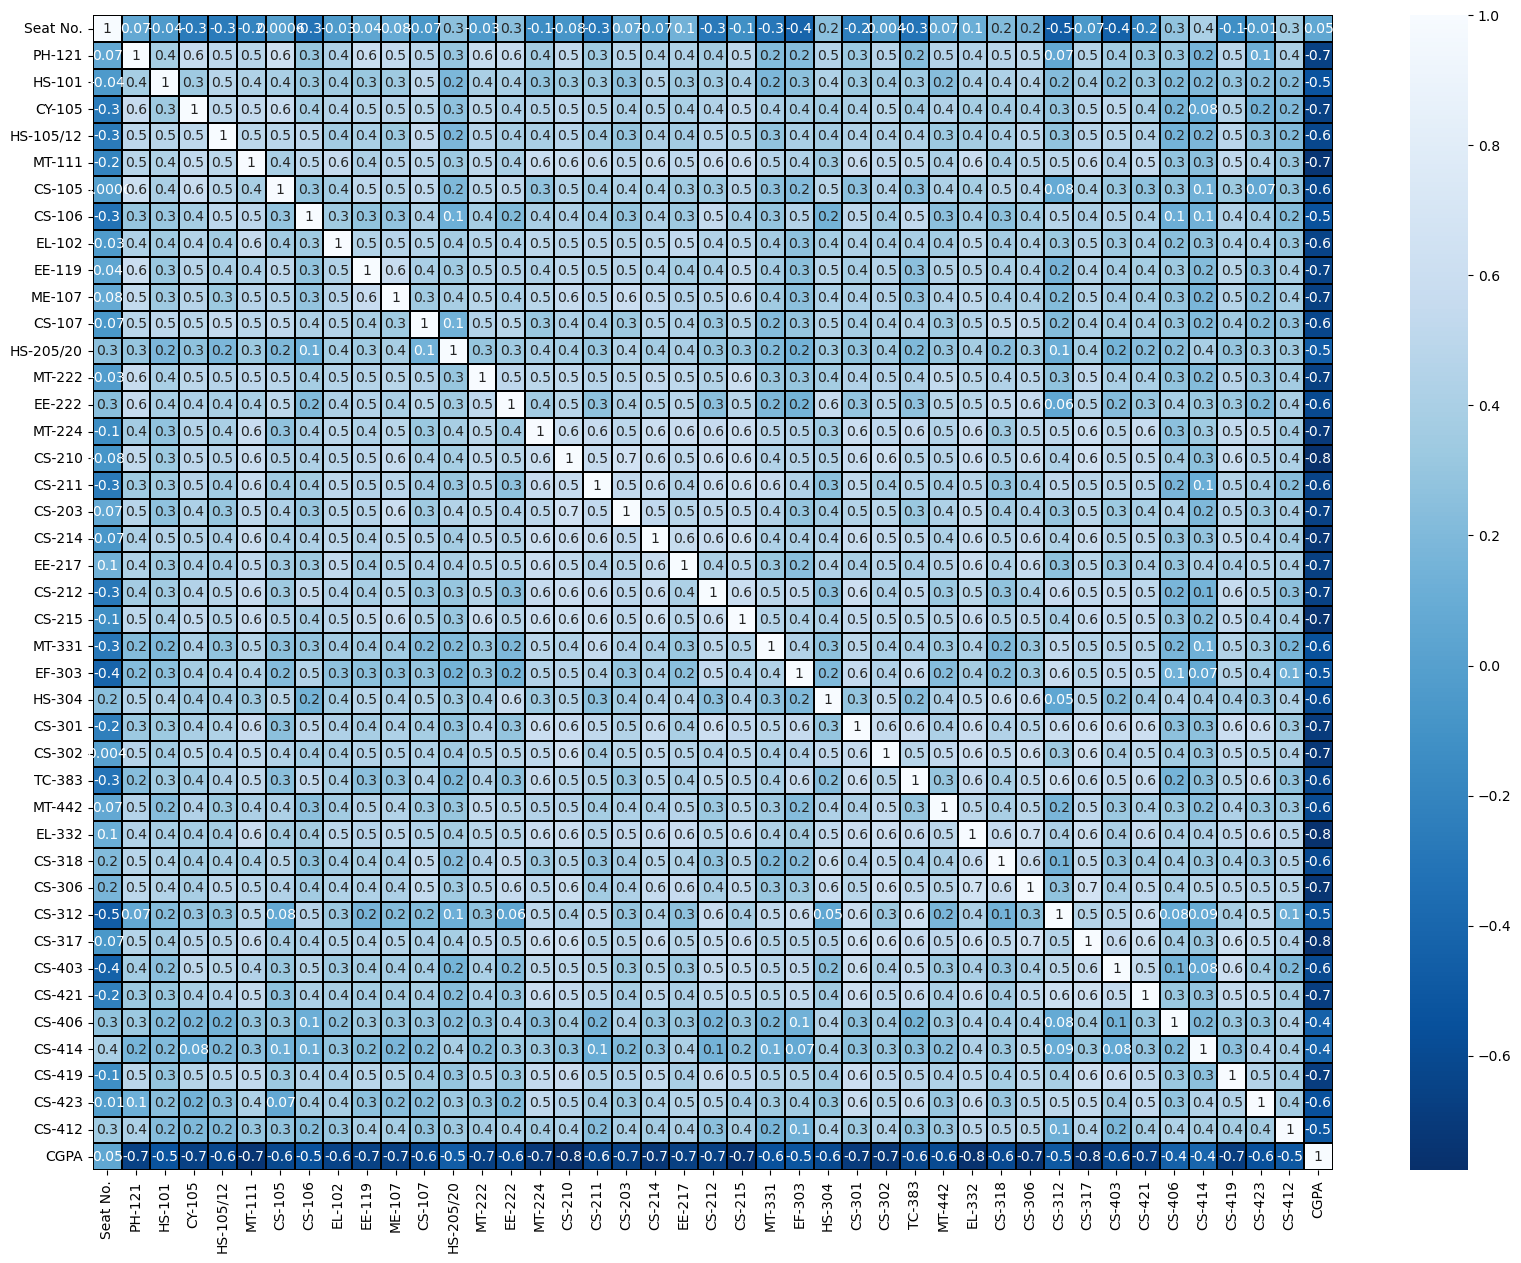

In [61]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

# Correlation between label and features using barplot

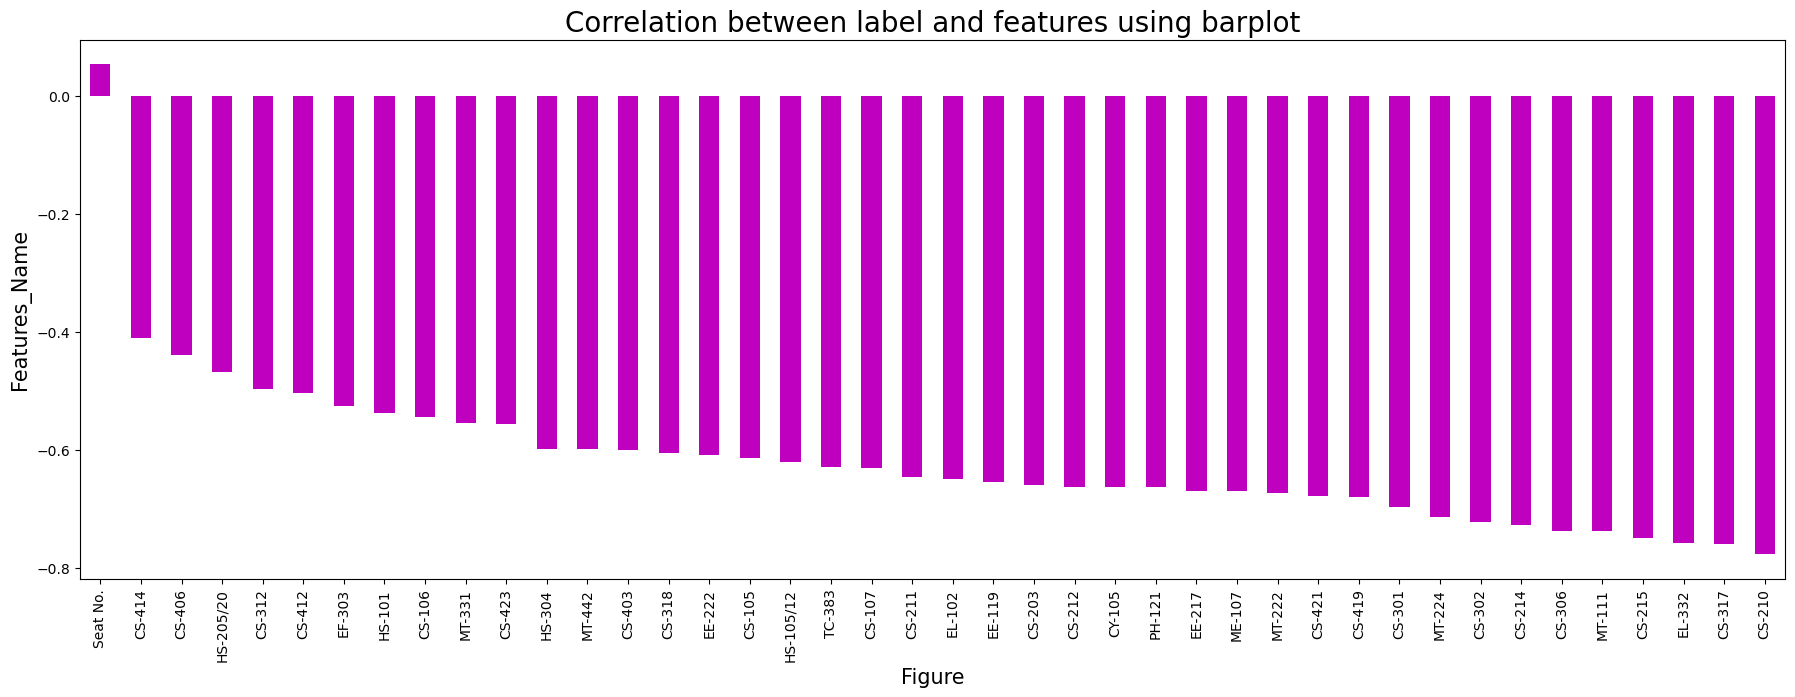

In [63]:
plt.figure(figsize=(22,7))
df.corr()['CGPA'].sort_values(ascending = False).drop(['CGPA']).plot(kind = 'bar', color="m")
plt.xlabel('Figure', fontsize =15)
plt.ylabel('Features_Name',fontsize =15)
plt.title('Correlation between label and features using barplot', fontsize =20)
plt.show()

# Prepating data - We can scale before proceeding with Prediction

In [64]:
# Separating the independent and target variables into X and Y

x = df.drop("CGPA", axis =1)
y= df['CGPA']

print("Features Dimension =",x.shape)
print('Label Dimension =', y.shape)

Features Dimension = (571, 42)
Label Dimension = (571,)


independent and dependent valriable dimension shoild be equal.

# Feature Scaling using Standard Scalarization

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-1.729020,0.400402,1.770900,1.721991,0.548389,1.372963,2.657832,1.789175,1.332669,0.417365,...,0.654698,1.161705,1.157159,1.530930,0.947978,-0.045570,-1.415591,1.734677,-0.366108,-0.078558
1,-1.722953,-1.242052,1.411559,2.397746,1.488014,0.367537,1.173242,1.789175,-1.310604,2.302135,...,1.710986,1.761537,1.522406,0.849569,1.317776,-0.045570,0.964785,0.888567,0.714752,0.244571
2,-1.716887,-1.242052,-0.744483,-0.981031,0.235181,0.032395,-1.053643,0.319611,0.011033,-0.713496,...,-0.753686,-0.337873,-0.669075,-1.194515,0.208383,-2.249415,-1.415591,-1.649763,-0.726395,-2.311439
3,-1.710820,1.714365,0.692879,2.397746,1.488014,1.708105,-0.311348,2.156566,1.332669,1.925181,...,1.358890,1.761537,0.426666,2.212291,0.947978,0.741662,0.592096,1.311622,1.075039,1.078732
4,-1.704753,-0.585070,-1.103823,-0.305275,-0.078027,-1.308173,-1.053643,-0.782562,0.011033,-1.467404,...,-0.753686,0.261958,-0.303828,0.168207,-0.161414,-0.045570,-1.415591,-0.803653,-0.726395,-2.311439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,1.704753,-0.256579,-1.822504,-0.981031,-0.704444,-0.973031,-1.053643,-0.782562,-0.649785,-1.090450,...,-0.049494,-0.637789,-1.034321,-1.194515,-2.010402,-2.249415,0.794155,0.042457,-0.366108,-2.311439
567,1.710820,-0.913561,-1.822504,-0.981031,-1.330861,-1.308173,-1.053643,-1.517344,-0.649785,-1.467404,...,-0.753686,-0.037957,-0.303828,-1.194515,-2.010402,-0.045570,0.592096,-0.803653,0.714752,-0.078558
568,1.716887,-0.256579,-1.822504,-0.305275,-0.078027,-1.308173,-1.053643,-1.517344,-1.310604,-1.467404,...,-0.049494,-0.637789,-0.669075,-1.194515,-0.531212,-2.249415,1.113937,0.042457,-0.726395,-0.078558
569,1.722953,-1.242052,-0.385142,2.059868,-1.330861,1.708105,2.657832,0.319611,1.332669,0.417365,...,-0.049494,1.461621,-0.669075,-0.172473,0.947978,1.389052,1.113937,-0.380598,0.354465,0.908932


# Checking Variance Inflation Factor(VIF)

In [66]:
# Finding variance inflation factor in each scales columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values,i)
                   for i in range (len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.841154,Seat No.
1,2.877554,PH-121
2,1.782156,HS-101
3,2.566872,CY-105
4,2.413938,HS-105/12
5,2.690027,MT-111
6,2.401785,CS-105
7,1.971367,CS-106
8,1.985937,EL-102
9,2.193039,EE-119


By checking VIF values we can not find the feature causing Multi collinearity problem.Here we can not find the features have VIF value greater than 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF. But in this we do not find VIF issue.

# Modelling

In [67]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [68]:
# importing necessary libraries:

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [70]:
x.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-1.729020,0.400402,1.770900,1.721991,0.548389,1.372963,2.657832,1.789175,1.332669,0.417365,...,0.654698,1.161705,1.157159,1.530930,0.947978,-0.045570,-1.415591,1.734677,-0.366108,-0.078558
1,-1.722953,-1.242052,1.411559,2.397746,1.488014,0.367537,1.173242,1.789175,-1.310604,2.302135,...,1.710986,1.761537,1.522406,0.849569,1.317776,-0.045570,0.964785,0.888567,0.714752,0.244571
2,-1.716887,-1.242052,-0.744483,-0.981031,0.235181,0.032395,-1.053643,0.319611,0.011033,-0.713496,...,-0.753686,-0.337873,-0.669075,-1.194515,0.208383,-2.249415,-1.415591,-1.649763,-0.726395,-2.311439
3,-1.710820,1.714365,0.692879,2.397746,1.488014,1.708105,-0.311348,2.156566,1.332669,1.925181,...,1.358890,1.761537,0.426666,2.212291,0.947978,0.741662,0.592096,1.311622,1.075039,1.078732
4,-1.704753,-0.585070,-1.103823,-0.305275,-0.078027,-1.308173,-1.053643,-0.782562,0.011033,-1.467404,...,-0.753686,0.261958,-0.303828,0.168207,-0.161414,-0.045570,-1.415591,-0.803653,-0.726395,-2.311439


In [71]:
print(y)

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64


In [72]:
print("Features Dimension =",x.shape)
print('Label Dimension =', y.shape)

Features Dimension = (571, 42)
Label Dimension = (571,)


# Creating train test split

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state= 42)

In [74]:
print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (399, 42)
Size of y_train :  (399,)
Size of X_test :  (172, 42)
Size of Y_test :  (172,)


# Linear Regression

In [75]:
LR =LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)


print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.9719131017300935
R2_score on training Data:- 94.29815936671974
Mean Absolute Error:- 0.0718761365289247
Mean Squarded error:- 0.009517917037976525
Root Mean Squared Error:- 0.09755981261757592


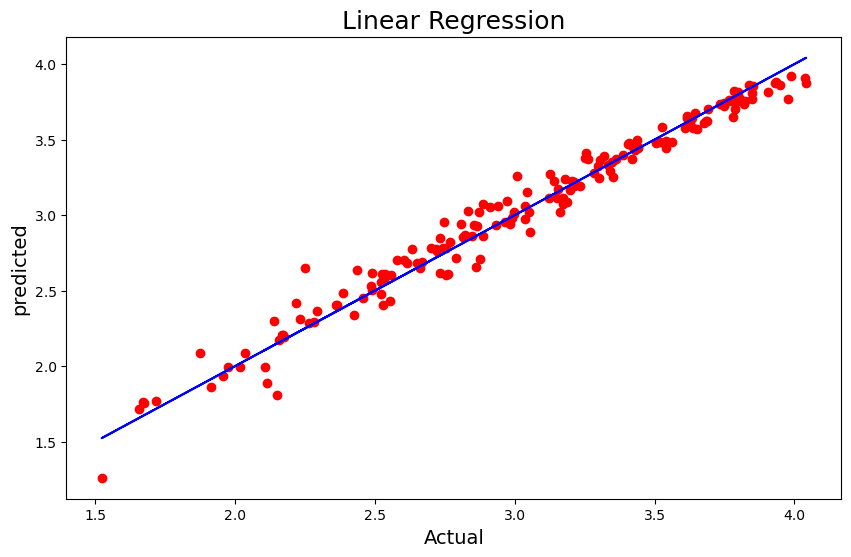

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# RandomForestRegressor

In [79]:
RFR =RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.9413417907575674
R2_score on training Data:- 98.9735110330879
Mean Absolute Error:- 0.09462773255813944
Mean Squarded error:- 0.019877736722674406
Root Mean Squared Error:- 0.14098842761969652


# KNN

In [80]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.9482702399727856
R2_score on training Data:- 94.59574176327048
Mean Absolute Error:- 0.09613023255813954
Mean Squarded error:- 0.017529866046511633
Root Mean Squared Error:- 0.1324004004771573


# GradientBoostingRegressor

In [81]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.954297835510852
R2_score on training Data:- 99.67379238423403
Mean Absolute Error:- 0.08976817391352372
Mean Squarded error:- 0.015487271178310662
Root Mean Squared Error:- 0.12444786530234522


# Lasso

In [82]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: -0.03739769771335144
R2_score on training Data:- 0.0
Mean Absolute Error:- 0.49706893687707626
Mean Squarded error:- 0.3515470141038247
Root Mean Squared Error:- 0.5929140022834886


# Ridge

In [83]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.9720694870509385
R2_score on training Data:- 94.29810174527078
Mean Absolute Error:- 0.07166187557609383
Mean Squarded error:- 0.009464922132826908
Root Mean Squared Error:- 0.09728783137076757


# Support Vector Regression (SVR)

In [85]:
from sklearn.svm import SVR
svr=SVR()
svr=DecisionTreeRegressor()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_svr))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 0.8343742367440847
R2_score on training Data:- 100.0
Mean Absolute Error:- 0.1721453488372093
Mean Squarded error:- 0.05612625
Root Mean Squared Error:- 0.23690979295926118


# ExtraTreesRegressor

In [84]:
from sklearn.ensemble import ExtraTreesRegressor
etr=SVR()
etr=DecisionTreeRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_etr))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.8366526447311017
R2_score on training Data:- 100.0
Mean Absolute Error:- 0.17805232558139536
Mean Squarded error:- 0.0553541569767442
Root Mean Squared Error:- 0.23527464159306288


# Cross_val_score

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_LR)-score.mean()*100)

[0.93984716 0.95046659 0.93585753 0.96869739 0.89867886]
0.9387095043202155
Difference between R2 score and cross validiation score is - -92.89903733029145


In [88]:
score1 = cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_RFR)-score1.mean()*100)

[0.92959279 0.93346407 0.94916715 0.94277626 0.87580651]
0.9261613551947203
Difference between R2 score and cross validiation score is - -91.67479372871448


In [89]:
score2 = cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_knn)-score2.mean()*100)

[0.92053385 0.95025503 0.9175447  0.95474955 0.85598179]
0.9198129868929353
Difference between R2 score and cross validiation score is - -91.03302844932075


In [90]:
score3 = cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_GBR)-score3.mean()*100)

[0.96504417 0.94563822 0.95952512 0.95384935 0.90245882]
0.9453031359746158
Difference between R2 score and cross validiation score is - -93.57601576195073


In [91]:
score4 = cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_lasso)-score4.mean()*100)

[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
Difference between R2 score and cross validiation score is - 0.7709543645998088


In [94]:
# X is the feature matrix, y is the target vector
scores = cross_val_score(LR, x, y, cv=5) 
scores

array([0.93984716, 0.95046659, 0.93585753, 0.96869739, 0.89867886])

In [95]:
score5 = cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_rd)-score5.mean()*100)

[0.94000992 0.95053179 0.93592213 0.96894469 0.8987315 ]
0.9388280062520942
Difference between R2 score and cross validiation score is - -92.91073113815847


In [96]:
score6 = cross_val_score(svr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_svr)-score6.mean()*100)

[0.83485137 0.8407467  0.85741541 0.79210668 0.73269732]
0.8115634981891825
Difference between R2 score and cross validiation score is - -80.32197558217416


In [97]:
score7 = cross_val_score(etr,x,y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_etr)-score7.mean()*100)

[0.82845208 0.84015632 0.84433819 0.71220106 0.73900748]
0.7928310271820568
Difference between R2 score and cross validiation score is - -78.44645007347458


# GridSearchCV 

In [99]:
from sklearn.model_selection import GridSearchCV 

In [100]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],   
    'random_state': [1, 4, 10, 20]}

In [101]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5,n_jobs=1)

In [102]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'random_state': [1, 4, 10, 20]})

In [103]:
GCV.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150,
 'random_state': 20}

In [104]:
from sklearn.metrics import mean_squared_error

# Assuming x_train, y_train, and x_test are the training features, training labels, and test features, respectively.

# Creating the Final_model with specific hyperparameters
Final_model = GradientBoostingRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=20)

# Fitting the model to the training data
Final_model.fit(x_train, y_train)

# Making predictions on the test data
pred = Final_model.predict(x_test)

mse = mean_squared_error(y_test, pred)
mse

0.028737259864186106

In [105]:
#Saving the model using .pkl (pickel)

import joblib

joblib.dump(Final_model, "Student grades prediction.pkl")

['Student grades prediction.pkl']

In [106]:
# lets load the saved model and get the predctions

model=joblib.load("Student grades prediction.pkl")

#prediction

prediction = model.predict(x_test)
prediction

array([2.06865217, 3.47971285, 2.87405429, 2.45983214, 3.76956486,
       3.34695088, 2.58688748, 2.2175801 , 2.31801828, 3.00703179,
       3.58394345, 3.07178572, 3.80630141, 2.61060158, 3.86801346,
       2.4781947 , 2.30179383, 3.58438597, 2.15398584, 2.40273111,
       2.23513466, 3.75774446, 2.38998001, 2.59116883, 3.0208396 ,
       3.30242176, 3.23170772, 2.37703964, 3.29044483, 3.44428899,
       2.35491251, 2.59135584, 3.39559538, 3.384981  , 3.54574591,
       3.26516633, 2.52954613, 3.8279327 , 3.03183087, 2.13240403,
       3.72887691, 3.54653958, 3.70542743, 3.66610474, 3.45798996,
       2.65192833, 2.77729499, 3.24298969, 3.14043696, 3.78617272,
       3.37193553, 3.53828434, 3.32632288, 3.56530835, 3.10018989,
       3.26313416, 3.7228944 , 3.71553559, 3.65167642, 2.5872462 ,
       3.67139069, 3.61632551, 3.8688397 , 3.46023707, 3.51990425,
       2.95251017, 3.46552546, 2.888382  , 2.9285517 , 2.26731594,
       3.66268946, 3.49799231, 2.5687719 , 3.74903723, 3.91899

In [107]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,2.068652,1.992
1,3.479713,3.490
2,2.874054,2.823
3,2.459832,2.288
4,3.769565,3.816
...,...,...
167,3.598562,3.578
168,1.948010,1.764
169,3.405760,3.369
170,3.825079,3.919


# End